# Primera Figura #

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [20]:
font = {'size'   : 12}

matplotlib.rc('font', **font)

In [15]:
def diff(r_lamb,delta):
     return -(delta*r_lamb*np.exp(-r_lamb)+2*delta*np.exp(-r_lamb))/(delta*np.exp(-r_lamb)+1)

In [16]:
x=np.linspace(0,2, 200)
y=np.linspace(-.1,.1,200)

In [17]:
x,y= np.meshgrid(x,y)

In [18]:
z=diff(x,y)

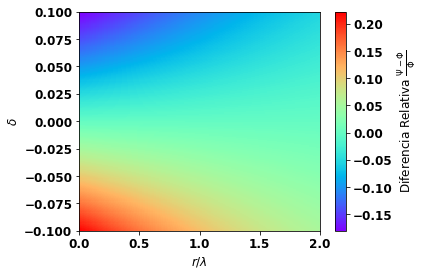

In [22]:
f= plt.figure()

CS=plt.pcolormesh(x,y,z, cmap="rainbow")#coolwarm
cbar = f.colorbar(CS)
cbar.set_label(r"Diferencia Relativa $\frac{\Psi-\Phi}{\Phi}$")
plt.xlabel(r"$r/\lambda$")
plt.ylabel(r"$\delta$")
plt.tight_layout()
plt.savefig("relDiff.png")

# Deducción de las cositas a partir de la métrica #

In [38]:
from sympy import *
from gravipy import *
init_printing(use_latex='mathjax')

In [45]:
delta, lamb, R_sc=symbols("\delta, \lambda, R_s")
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M')
x = Coordinates('\chi', [t, r, theta, phi])
phi = -2*R_sc*(delta*exp(-r/lamb)+1)/(r*(delta+1))
Metric = diag(1+phi, -(1-phi), -r**2, -r**2*sin(theta)**2)

In [46]:
g = MetricTensor('g', x, Metric)

In [47]:
g(All, All)

⎡       ⎛          -r       ⎞                                                 
⎢       ⎜        ───────    ⎟                                                 
⎢       ⎜        \lambda    ⎟                                                 
⎢  2⋅Rₛ⋅⎝\delta⋅ℯ        + 1⎠                                                 
⎢- ────────────────────────── + 1                 0                   0       
⎢        r⋅(\delta + 1)                                                       
⎢                                                                             
⎢                                         ⎛          -r       ⎞               
⎢                                         ⎜        ───────    ⎟               
⎢                                         ⎜        \lambda    ⎟               
⎢                                    2⋅Rₛ⋅⎝\delta⋅ℯ        + 1⎠               
⎢               0                  - ────────────────────────── - 1   0       
⎢                                          r⋅(\delta

In [48]:
Ga = Christoffel('Ga', g)

In [52]:
Ga.components

⎧                                           ⎛                   ⎛             
⎪                                           ⎜                   ⎜          ───
⎪                                           ⎜                   ⎜          \la
⎨                                        Rₛ⋅⎝\delta⋅r + \lambda⋅⎝\delta + ℯ   
⎪(-1, 1, 1): 0, (1, 1, 1): 0, (1, 1, 2): ─────────────────────────────────────
⎪                                                               2             
⎩                                                      \lambda⋅r ⋅(\delta + 1)

r   ⎞⎞    -r                                               ⎛                  
────⎟⎟  ───────                                            ⎜                  
mbda⎟⎟  \lambda                                            ⎜                  
    ⎠⎠⋅ℯ                                                Rₛ⋅⎝\delta⋅r + \lambda
───────────────, (1, 1, 3): 0, (1, 1, 4): 0, (1, 2, 1): ──────────────────────
                                                   

In [53]:
tau = symbols('\\tau')
w = Geodesic('w', g, tau)

In [61]:
w(3)

                                                                2             
 2                                           ⎛  d              ⎞     2        
r (\tau)⋅sin(\theta(\tau))⋅cos(\theta(\tau))⋅⎜─────(\phi(\tau))⎟  - r (\tau)⋅─
                                             ⎝d\tau            ⎠              
                                                                             d

  2                                                               
 d                                d                   d           
─────(\theta(\tau)) - 2⋅r(\tau)⋅─────(\theta(\tau))⋅─────(r(\tau))
    2                           d\tau               d\tau         
\tau                                                              